In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import pandas as pd
import os
import sys
import re
import seaborn as sns
import matplotlib.dates as mdates

rel_path = '..//..//..//experiments//'
total_order = 11483

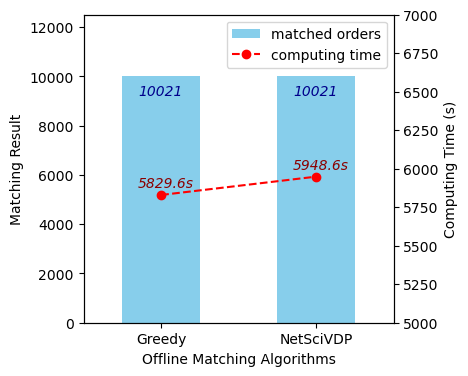

In [9]:
df_offline = pd.read_csv("..//..//..//Database//offline_result//match_result_weight1.csv", index_col=0)
fig,ax = plt.subplots(figsize = (4,4))


plt.bar(df_offline.index, df_offline['match_result'], width=0.5, label='matched orders', color= 'skyblue')
for i,j in zip(df_offline.index, df_offline['match_result']):
    ax.annotate(str(j),xy=(i-0.15,j-800), color='darkblue', style='italic')
plt.xticks([0,1], ['Greedy', 'NetSciVDP'])
plt.xlim(-0.5, 1.5)
plt.ylim(0, 12500)
plt.xlabel('Offline Matching Algorithms')
plt.ylabel('Matching Result')



ax2 = ax.twinx()
plt.plot(df_offline.index, df_offline['time'], color = 'red', linestyle = '--', marker='o', label='computing time', axes=ax2)
for i,j in zip(df_offline.index, df_offline['time']):
    ax2.annotate(str(round(j,1)) +'s',xy=(i-0.15,j+50), color='darkred', style='italic')

ax2.set_ylabel('Computing Time (s)')
ax2.set_ylim(5000, 7000)

handle, label = ax.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax.legend(handle+handle2, label+label2, loc='upper right')

plt.savefig(rel_path + 'offline_result.png', dpi=300, bbox_inches='tight')

,match_result,time,weight,opt_int,roll_int,locked_int
0,9970,11594.604287,T,60,30,40
1,9968,13223.728183,F,60,30,40
2,9915,16232.065428,T,60,20,30
3,9936,18532.621647,F,60,20,30
4,9789,9500.751995,T,30,10,20
5,9570,9789.605216,F,30,10,20
6,9497,12275.816844,T,30,10,15
7,9431,13097.190601,F,30,10,15
8,10175,24730.456317,T,30,5,10
9,10158,26965.333642,F,30,5,10


-4.545977911985888 1.9455180234899214


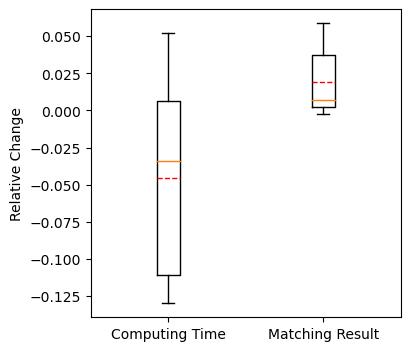

In [12]:
df_online1 = pd.read_csv(rel_path + "20240204-155640//match_result_mpc.csv", index_col=0)
df_online2 = pd.read_csv(rel_path + "20240208-094940//match_result_mpc.csv", index_col=0)
df_online = pd.concat([df_online1, df_online2], axis=0).reset_index(drop=True)

df_online_t = df_online[df_online["weight"] == "T"].reset_index(drop=True)
df_online_f = df_online[df_online["weight"] == "F"].reset_index(drop=True)
df_online_t["time_delta"] = (df_online_t["time"] - df_online_f["time"]) / df_online_f["time"]
df_online_t["match_result_delta"] = (df_online_t["match_result"] - df_online_f["match_result"]) / df_online_f["match_result"]

fig, ax = plt.subplots(figsize=(4, 4))
plt.boxplot(df_online_t[["time_delta", "match_result_delta"]],labels=['Computing Time', 'Matching Result'], 
    showmeans=True,
    meanline=True,
    meanprops={"color": "r", "linestyle": "--"},
)
plt.ylabel('Relative Change')
plt.savefig(rel_path + 'online_result_compare.png', dpi=300, bbox_inches='tight')

print(df_online_t['time_delta'].mean() *100, df_online_t['match_result_delta'].mean()*100)
# sns.stripplot(df_online_t[["time_delta", "match_result_delta"]], color="r", marker="o", jitter=0.2, size=10)

In [49]:
df_online

,match_result,time,weight,$t_o$,$t_r$,$t_l$,RSR,Algorithm
0,9970,11594.604287,NetSicVDP,60,30,40,0.868240,NetSicVDP
1,9968,13223.728183,Greedy,60,30,40,0.868066,Greedy
2,9915,16232.065428,NetSicVDP,60,20,30,0.863450,NetSicVDP
3,9936,18532.621647,Greedy,60,20,30,0.865279,Greedy
4,9789,9500.751995,NetSicVDP,30,10,20,0.852478,NetSicVDP
5,9570,9789.605216,Greedy,30,10,20,0.833406,Greedy
6,9497,12275.816844,NetSicVDP,30,10,15,0.827049,NetSicVDP
7,9431,13097.190601,Greedy,30,10,15,0.821301,Greedy
8,10175,24730.456317,NetSicVDP,30,5,10,0.886092,NetSicVDP
9,10158,26965.333642,Greedy,30,5,10,0.884612,Greedy


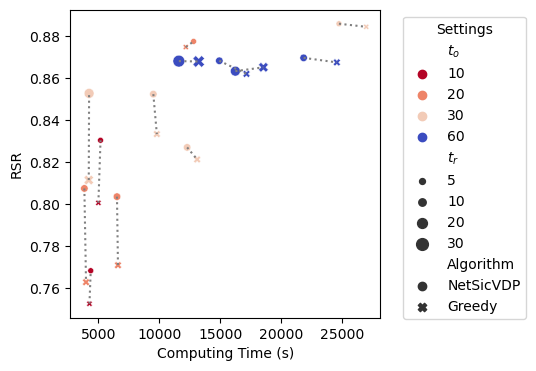

In [29]:
df_online['Algorithm'] = ['NetSicVDP', 'Greedy'] * int(len(df_online)/2)
df_online['RSR'] = df_online['match_result'] / total_order
df_online.columns = ['match_result', 'time','weight', '$t_o$', '$t_r$', '$t_l$', 'RSR', 'Algorithm']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="time",
    y="RSR",
    hue="$t_o$",
    size="$t_r$",
    style="Algorithm",
    palette=plt.get_cmap('coolwarm').reversed(),
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="time",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Settings')
plt.xlabel('Computing Time (s)')
plt.ylabel('RSR')

plt.savefig(rel_path + 'online_time_rsr_result_color.png', dpi=300, bbox_inches='tight')

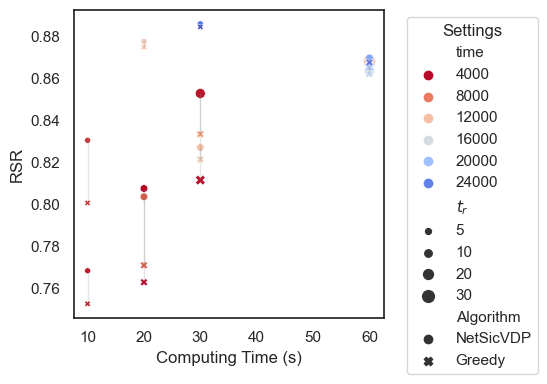

In [48]:
df_online['Algorithm'] = ['NetSicVDP', 'Greedy'] * int(len(df_online)/2)
df_online['RSR'] = df_online['match_result'] / total_order
df_online.columns = ['match_result', 'time','weight', '$t_o$', '$t_r$', '$t_l$', 'RSR', 'Algorithm']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="$t_o$",
    y="RSR",
    hue="time",
    size="$t_r$",
    style="Algorithm",
    palette=plt.get_cmap('coolwarm').reversed(),
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="$t_o$",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Settings')
plt.xlabel('Computing Time (s)')
plt.ylabel('RSR')

plt.savefig(rel_path + 'online_time_rsr_result_color.png', dpi=300, bbox_inches='tight')

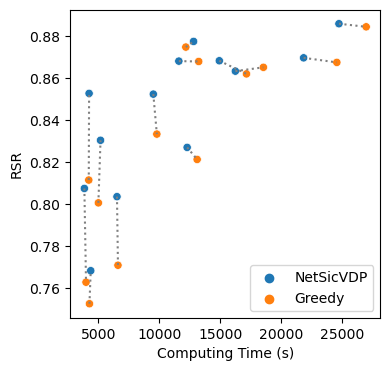

In [30]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="time",
    y="RSR",
    hue="Algorithm",
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="time",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )
plt.legend(loc='lower right')
plt.xlabel('Computing Time (s)')
plt.ylabel('RSR')
plt.savefig(rel_path + 'online_time_rsr_result.png', dpi=300, bbox_inches='tight')

In [31]:
df = pd.read_csv("..//..//..//experiments//para_log_combine.csv")
newdf = df.loc[df.index.repeat((120 / df.roll).round().astype(int))]

time_list = []
for i in (120 / df.roll).round().astype(int):
    temp = pd.date_range(
        start=pd.to_datetime("2022-06-01 08:00:00 AM"),
        end=pd.to_datetime("2022-06-01 10:00:00 AM"),
        freq=str(120 / i) + "min",
    ).tolist()[1:]
    time_list.extend(temp)

newdf["time"] = time_list
newdf.set_index(["opt", "roll", "locked", "weight"], inplace=True)

In [32]:
newdf

time
opt roll locked weight                    
60  30   40     T      2022-06-01 08:30:00
                T      2022-06-01 09:00:00
                T      2022-06-01 09:30:00
                T      2022-06-01 10:00:00
                F      2022-06-01 08:30:00
...                                    ...
    10   30     F      2022-06-01 09:20:00
                F      2022-06-01 09:30:00
                F      2022-06-01 09:40:00
                F      2022-06-01 09:50:00
                F      2022-06-01 10:00:00

[368 rows x 1 columns]

In [33]:
result_set = ['20240204-155640', '20240208-094940']

dic = {}

for path in result_set:
    folder = rel_path + path + '/result_analysis'
    print(folder)
    os.makedirs(folder, exist_ok=True) 
    files = os.listdir(rel_path + path)
    for file in files:
        if (file.endswith(".txt")& (('log' in file)== False)):
            n_int = re.search(r"\d{2}_\d*_\d*", file)
            weight = re.search(r"\w.txt", file).group(0)[0]
            temp = str([int(s) for s in n_int.group(0).split('_') if s.isdigit()] + [str(weight)])
            val = []
            filename_a = rel_path + path+"/"+file
            with open(filename_a, "r") as f:
                for line in f:
                    m = re.search(r"Total matched order so far (\d*)", line)
                    if m:
                        val.append(m.group(1))

            dic[temp] = np.array(val).astype(int)
               

..//..//..//experiments//20240204-155640/result_analysis
..//..//..//experiments//20240208-094940/result_analysis


In [34]:
for key in dic.keys():
    try:
        key1 = eval(key)
        newdf.loc[tuple(key1), "matched"] = dic[key]
    except:
        pass
newdf

C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\2260148192.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  newdf.loc[tuple(key1), "matched"] = dic[key]
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\2260148192.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  newdf.loc[tuple(key1), "matched"] = dic[key]


time  matched
opt roll locked weight                             
60  30   40     T      2022-06-01 08:30:00   3254.0
                T      2022-06-01 09:00:00   5714.0
                T      2022-06-01 09:30:00   8186.0
                T      2022-06-01 10:00:00   9970.0
                F      2022-06-01 08:30:00   3244.0
...                                    ...      ...
    10   30     F      2022-06-01 09:20:00   8185.0
                F      2022-06-01 09:30:00   9022.0
                F      2022-06-01 09:40:00   9963.0
                F      2022-06-01 09:50:00   9963.0
                F      2022-06-01 10:00:00   9963.0

[368 rows x 2 columns]

In [35]:
newdf.reset_index(inplace=True)
newdf

,opt,roll,locked,weight,time,matched
0,60,30,40,T,2022-06-01 08:30:00,3254.0
1,60,30,40,T,2022-06-01 09:00:00,5714.0
2,60,30,40,T,2022-06-01 09:30:00,8186.0
3,60,30,40,T,2022-06-01 10:00:00,9970.0
4,60,30,40,F,2022-06-01 08:30:00,3244.0
...,...,...,...,...,...,...
363,60,10,30,F,2022-06-01 09:20:00,8185.0
364,60,10,30,F,2022-06-01 09:30:00,9022.0
365,60,10,30,F,2022-06-01 09:40:00,9963.0
366,60,10,30,F,2022-06-01 09:50:00,9963.0


In [36]:
newdf['time'] = pd.to_datetime(newdf['time'], format = '%H:%M:%S')
newdf

,opt,roll,locked,weight,time,matched
0,60,30,40,T,2022-06-01 08:30:00,3254.0
1,60,30,40,T,2022-06-01 09:00:00,5714.0
2,60,30,40,T,2022-06-01 09:30:00,8186.0
3,60,30,40,T,2022-06-01 10:00:00,9970.0
4,60,30,40,F,2022-06-01 08:30:00,3244.0
...,...,...,...,...,...,...
363,60,10,30,F,2022-06-01 09:20:00,8185.0
364,60,10,30,F,2022-06-01 09:30:00,9022.0
365,60,10,30,F,2022-06-01 09:40:00,9963.0
366,60,10,30,F,2022-06-01 09:50:00,9963.0


In [37]:
newdf['Alg'] = newdf['weight'].map({'T': 'NetSciVDP', 'F': 'Greedy'})
newdf

,opt,roll,locked,weight,time,matched,Alg
0,60,30,40,T,2022-06-01 08:30:00,3254.0,NetSciVDP
1,60,30,40,T,2022-06-01 09:00:00,5714.0,NetSciVDP
2,60,30,40,T,2022-06-01 09:30:00,8186.0,NetSciVDP
3,60,30,40,T,2022-06-01 10:00:00,9970.0,NetSciVDP
4,60,30,40,F,2022-06-01 08:30:00,3244.0,Greedy
...,...,...,...,...,...,...,...
363,60,10,30,F,2022-06-01 09:20:00,8185.0,Greedy
364,60,10,30,F,2022-06-01 09:30:00,9022.0,Greedy
365,60,10,30,F,2022-06-01 09:40:00,9963.0,Greedy
366,60,10,30,F,2022-06-01 09:50:00,9963.0,Greedy


C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3723693573.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3723693573.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3723693573.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3723693573.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


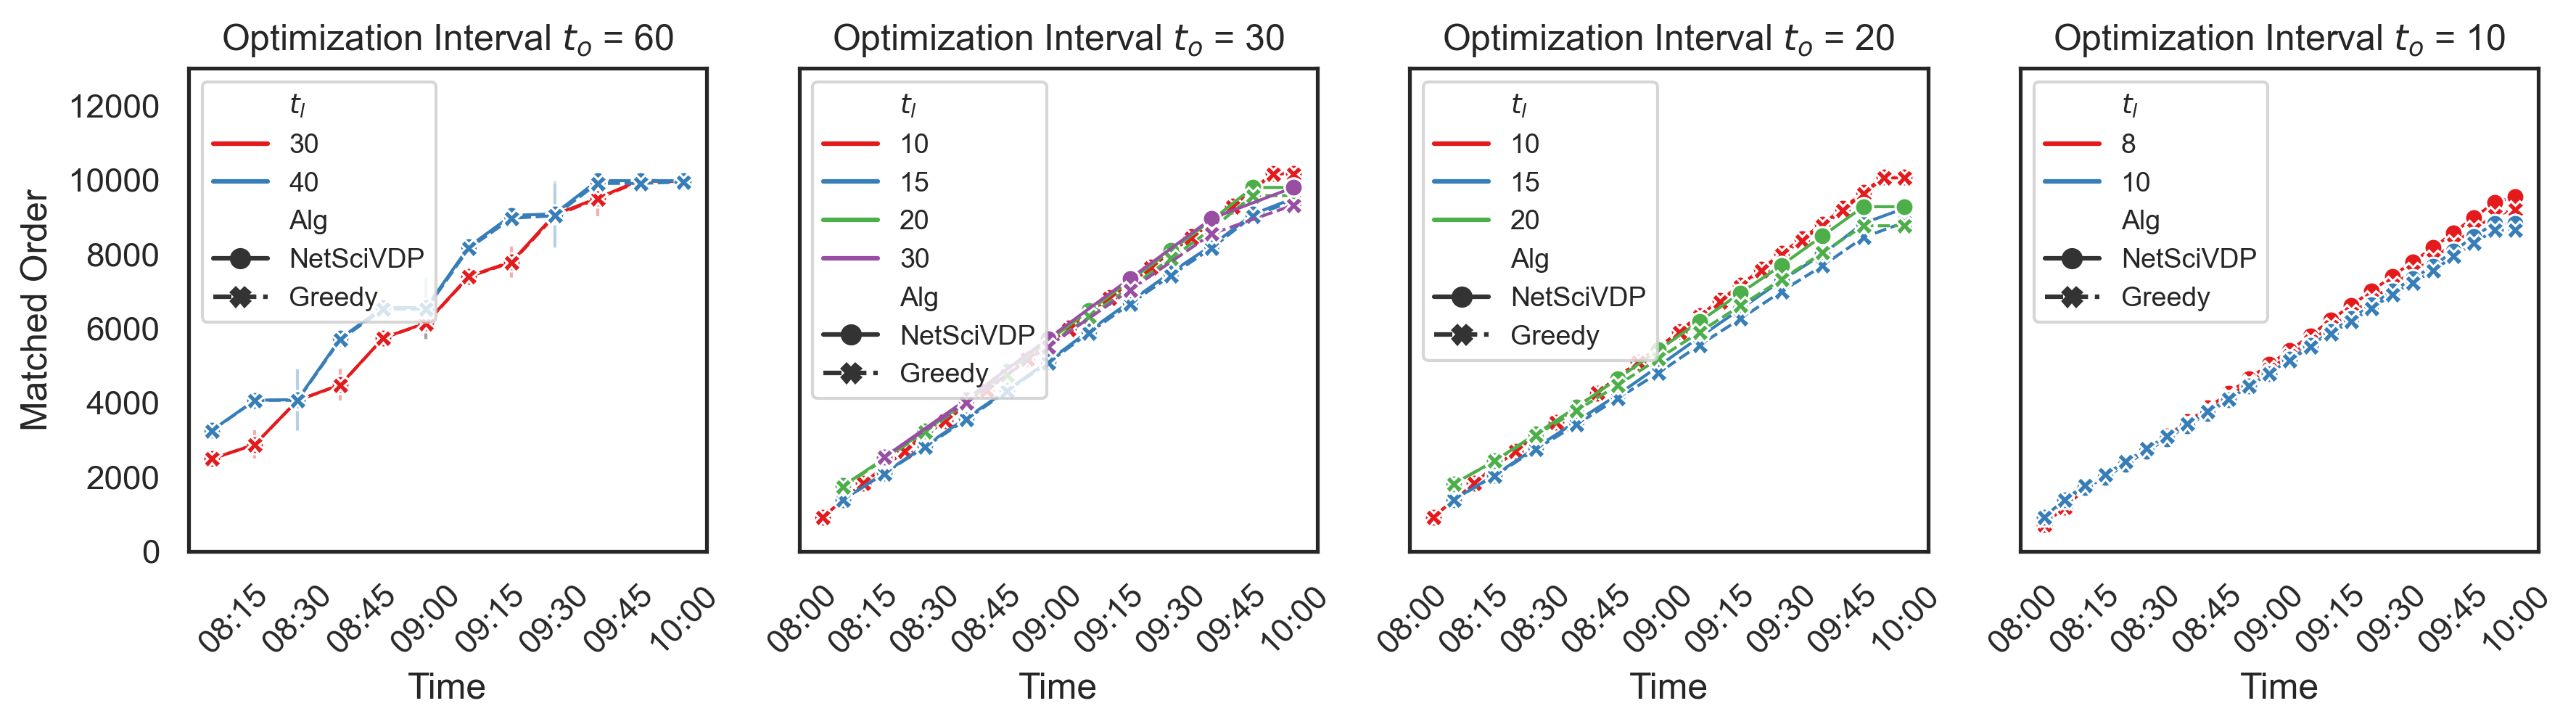

In [39]:
sns.set_theme(style="white")

df_for_match_plot = newdf[['opt', 'roll', 'locked', 'Alg', 'time', 'matched']]

fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey= True,  tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = df_for_match_plot[df_for_match_plot.opt == opt_int]
    temp.columns = ['$t_o$', '$t_r$', '$t_l$', 'Alg', 'time', 'matched']
    sns.lineplot(
        data=temp,
        x="time",
        y="matched",
        style="Alg",
        hue="$t_l$",
        ax=ax[i],
        palette="Set1",
        markers= True,
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
    ax[i].set_ylim(0, 13000)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc = 'upper left', fontsize = 9)

plt.savefig(rel_path + 'online_matched_order.png', dpi=300)

In [40]:
newdf

,opt,roll,locked,weight,time,matched,Alg
0,60,30,40,T,2022-06-01 08:30:00,3254.0,NetSciVDP
1,60,30,40,T,2022-06-01 09:00:00,5714.0,NetSciVDP
2,60,30,40,T,2022-06-01 09:30:00,8186.0,NetSciVDP
3,60,30,40,T,2022-06-01 10:00:00,9970.0,NetSciVDP
4,60,30,40,F,2022-06-01 08:30:00,3244.0,Greedy
...,...,...,...,...,...,...,...
363,60,10,30,F,2022-06-01 09:20:00,8185.0,Greedy
364,60,10,30,F,2022-06-01 09:30:00,9022.0,Greedy
365,60,10,30,F,2022-06-01 09:40:00,9963.0,Greedy
366,60,10,30,F,2022-06-01 09:50:00,9963.0,Greedy


In [41]:
newdf_t = newdf[newdf["weight"] == "T"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_f = newdf[newdf["weight"] == "F"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_t["matched_ratio"] = newdf_t["matched"] / newdf_f["matched"]
newdf_t = newdf_t[['opt', 'roll', 'locked', 'Alg', 'time', 'matched_ratio']]
newdf_t

,opt,roll,locked,Alg,time,matched_ratio
0,10,5,8,NetSciVDP,2022-06-01 08:05:00,1.000000
1,10,5,8,NetSciVDP,2022-06-01 08:10:00,1.000000
2,10,5,8,NetSciVDP,2022-06-01 08:15:00,0.998800
3,10,5,8,NetSciVDP,2022-06-01 08:20:00,0.996045
4,10,5,8,NetSciVDP,2022-06-01 08:25:00,1.004235
...,...,...,...,...,...,...
179,60,20,30,NetSciVDP,2022-06-01 10:00:00,0.997886
180,60,30,40,NetSciVDP,2022-06-01 08:30:00,1.003083
181,60,30,40,NetSciVDP,2022-06-01 09:00:00,1.003865
182,60,30,40,NetSciVDP,2022-06-01 09:30:00,1.003309


C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\4041710164.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\4041710164.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\4041710164.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\4041710164.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


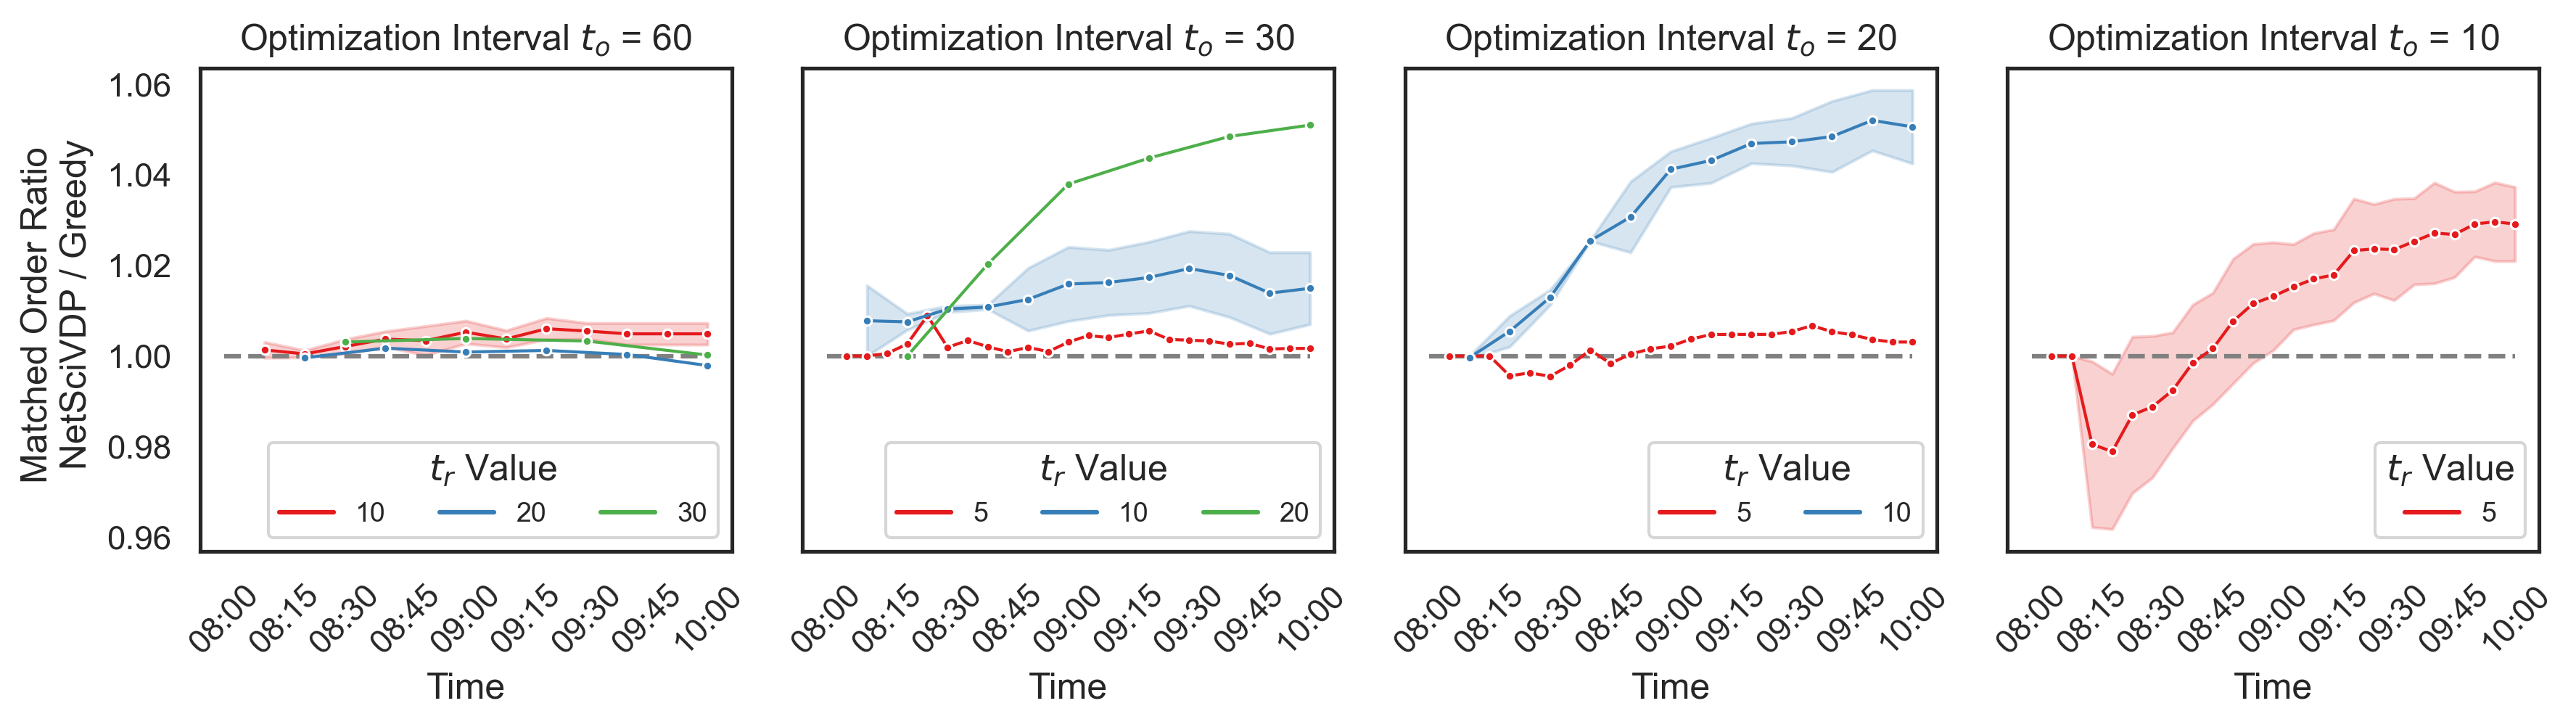

In [42]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = newdf_t[newdf_t.opt == opt_int]
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        # style="$t_r$",
        hue="$t_r$",
        ax=ax[i],
        palette="Set1",
        marker = '.',
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n NetSciVDP / Greedy")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc="lower right", ncol = 3, fontsize=9, title = "$t_r$ Value")


plt.savefig(rel_path + "online_matched_order_ratio_tr.png", dpi=300)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3475096755.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3475096755.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3475096755.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\3475096755.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


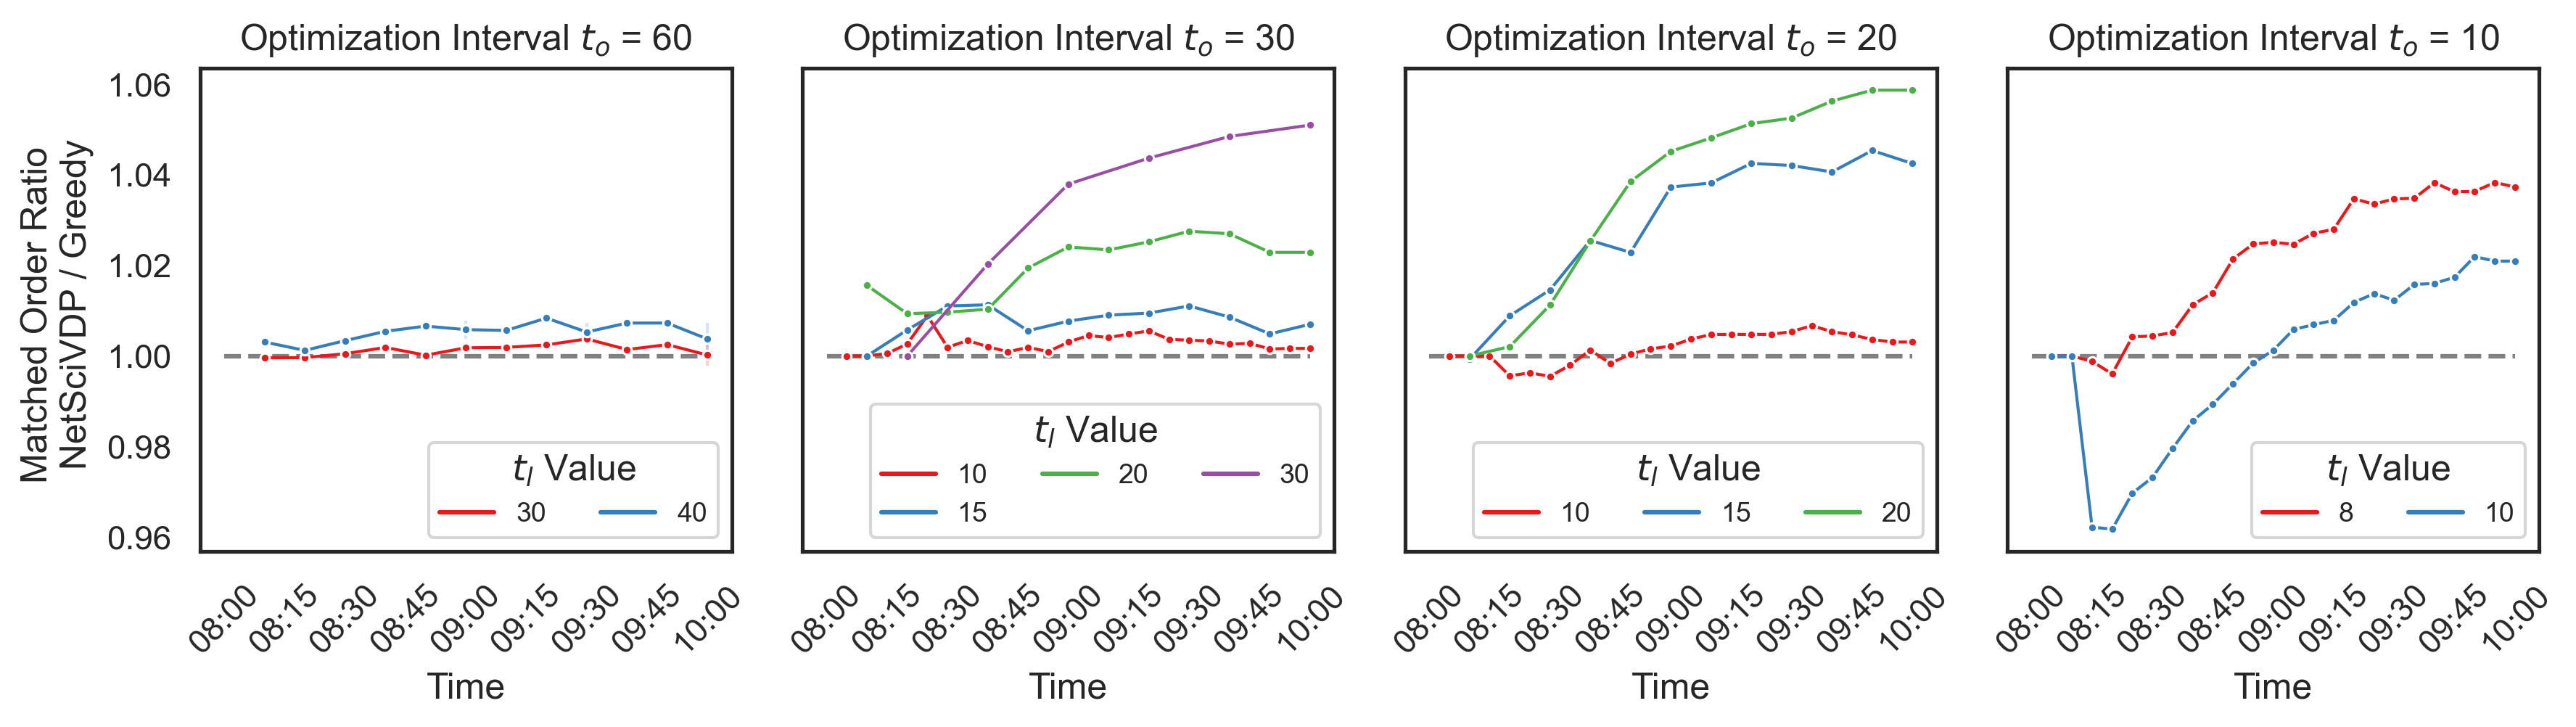

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = newdf_t[newdf_t.opt == opt_int]
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        # style="$t_r$",
        hue="$t_l$",
        ax=ax[i],
        palette="Set1",
        marker = '.',
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n NetSciVDP / Greedy")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc="lower right", ncol = 3, fontsize=9, title = "$t_l$ Value")


plt.savefig(rel_path + "online_matched_order_ratio_tl.png", dpi=300)

In [46]:
match_df.head()

,opt,roll,locked,weight,time,matched,Alg
3,60,30,40,T,2022-06-01 10:00:00,9970.0,NetSciVDP
7,60,30,40,F,2022-06-01 10:00:00,9968.0,Greedy
13,60,20,30,T,2022-06-01 10:00:00,9915.0,NetSciVDP
19,60,20,30,F,2022-06-01 10:00:00,9936.0,Greedy
31,30,10,20,T,2022-06-01 10:00:00,9789.0,NetSciVDP


C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\2866635577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['RSR'] = match_df['matched'] / total_order


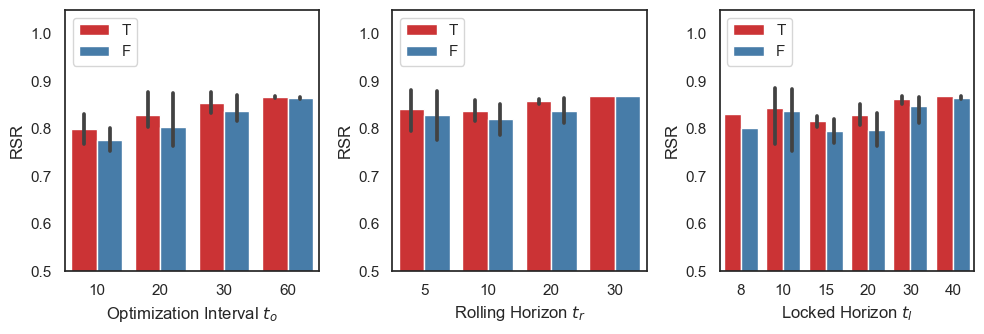

In [47]:
match_df = newdf[newdf['time'] == pd.to_datetime("2022-06-01 10:00:00 AM")]
match_df.columns = ['opt', 'roll', 'locked', '$w_{SP}$', 'time', 'matched', 'Alg']
match_df['RSR'] = match_df['matched'] / total_order
sns.set_theme(style="white")
fig, ax = plt.subplots(1,3, figsize=(10, 3.5), facecolor="w", edgecolor="k", tight_layout=True)
sns.barplot(data=match_df, x="opt", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[0])
ax[0].set_xlabel("Optimization Interval $t_o$")
ax[0].set_ylabel("RSR")
ax[0].legend(loc='upper left')
ax[0].set_ylim(0.5, 1.05)

sns.barplot(data=match_df, x="roll", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[1])
ax[1].set_xlabel("Rolling Horizon $t_r$")
ax[1].set_ylabel("RSR")
ax[1].legend(loc='upper left')
ax[1].set_ylim(0.5, 1.05)


sns.barplot(data=match_df, x="locked", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[2])
ax[2].set_xlabel("Locked Horizon $t_l$")
ax[2].set_ylabel("RSR")
ax[2].legend(loc= 'upper left')
ax[2].set_ylim(0.5, 1.05)

# sns.stripplot(x="Value", y="Case", hue="Vehicle", data=d_VMT_new,jitter=0.2 ,edgecolor='gray',palette  = [sns.color_palette('Set2')[7],sns.color_palette('Set2')[4]],
#                 # palette  = [sns.color_palette('Set2')[6]],
#                 size = 3.5, dodge=True, ax = ax2)
plt.savefig(rel_path + 'online_RSR.png', dpi=300)

In [ ]:
match_df

,opt,roll,locked,$w_{SP}$,time,matched,RSR
283,10,5,8,NetSicVDP,2022-06-01 10:00:00,9193.0,0.800575
139,20,10,15,NetSicVDP,2022-06-01 10:00:00,8851.0,0.770792
235,10,5,10,NetSicVDP,2022-06-01 10:00:00,8640.0,0.752417
43,30,10,20,NetSicVDP,2022-06-01 10:00:00,9570.0,0.833406
19,60,20,30,NetSicVDP,2022-06-01 10:00:00,9936.0,0.865279
7,60,30,40,NetSicVDP,2022-06-01 10:00:00,9968.0,0.868066
67,30,10,15,NetSicVDP,2022-06-01 10:00:00,9431.0,0.821301
187,20,5,10,NetSicVDP,2022-06-01 10:00:00,10047.0,0.874946
115,30,5,10,NetSicVDP,2022-06-01 10:00:00,10158.0,0.884612
3,60,30,40,Greedy,2022-06-01 10:00:00,9970.0,0.868240
